In [2]:
import numpy as np
import matplotlib.pyplot as plt

from defdap.quat import Quat
import defdap.ebsd as ebsd

from defdap.plotting import PolePlot

%matplotlib osx

In [3]:
EbsdFilePath = "/Users/mbcx9ma4/Dropbox (The University of Manchester)/Beta Reconstruction/data/triple_point/ZrNb_triplepoint_alpha"

EbsdMap = ebsd.Map(EbsdFilePath, "hexagonal")
EbsdMap.buildQuatArray()

EbsdMap.findBoundaries(boundDef=4)
EbsdMap.findGrains(minGrainSize=5)

EbsdMap.calcGrainAvOris()

Loaded EBSD data (dimensions: 285 x 276 pixels, step size: 5.0 um)
Done                                               

In [5]:
EbsdMap.plotEulerMap(plotScaleBar=True, plotGBs=True)

In [13]:
len(EbsdMap)

2214

In [14]:
EbsdMap.plotBoundaryMap()

In [15]:
EbsdMap.locateGrainID(plotGBs=True)

## Burgers relation

In [16]:
eulers = np.array([135., 90., 354.74])*np.pi/180.
burgersQuat = Quat(*eulers)
burgersQuat = burgersQuat.conjugate

In [56]:
burgersQuat.rotMatrix()

array([[-7.04129114e-01, -6.48243097e-02,  7.07106781e-01],
       [ 7.04129114e-01,  6.48243097e-02,  7.07106781e-01],
       [-9.16754180e-02,  9.95788942e-01,  1.11022302e-16]])

In [57]:
# HCP -> BCC
np.array([
    [-0.5*(1 + 1/np.sqrt(6)), 0.5*(1/np.sqrt(3) - 1/np.sqrt(2)), 1/np.sqrt(2)],
    [0.5*(1 + 1/np.sqrt(6)), -0.5*(1/np.sqrt(3) - 1/np.sqrt(2)), 1/np.sqrt(2)],
    [-0.5*(1 - 2/np.sqrt(6)), 0.5*(1/np.sqrt(3) + 2/np.sqrt(2)), 0]
])

array([[-0.70412415, -0.06487826,  0.70710678],
       [ 0.70412415,  0.06487826,  0.70710678],
       [-0.09175171,  0.99578192,  0.        ]])

In [31]:
np.linalg.inv(np.array([
    [-0.5*(1 + 1/np.sqrt(6)), 0.5*(1/np.sqrt(3) - 1/np.sqrt(2)), 1/np.sqrt(2)],
    [0.5*(1 + 1/np.sqrt(6)), -0.5*(1/np.sqrt(3) - 1/np.sqrt(2)), 1/np.sqrt(2)],
    [-0.5*(1 - 2/np.sqrt(6)), 0.5*(1/np.sqrt(3) + 2/np.sqrt(2)), 0]
]))

array([[-0.70412415,  0.70412415, -0.09175171],
       [-0.06487826,  0.06487826,  0.99578192],
       [ 0.70710678,  0.70710678,  0.        ]])

## Hex symmetries subset

In [13]:
hexSymms = Quat.symEqv("hexagonal")

for i, symm in enumerate(hexSymms):
    print(i, symm)

0 [1.0000, 0.0000, 0.0000, 0.0000]
1 [0.0000, 1.0000, 0.0000, 0.0000]
2 [0.0000, 0.0000, 1.0000, 0.0000]
3 [0.0000, 0.0000, 0.0000, 1.0000]
4 [0.8660, 0.0000, 0.0000, 0.5000]
5 [0.5000, 0.0000, 0.0000, 0.8660]
6 [0.5000, 0.0000, 0.0000, -0.8660]
7 [0.8660, 0.0000, 0.0000, -0.5000]
8 [0.0000, -0.5000, -0.8660, 0.0000]
9 [0.0000, 0.5000, -0.8660, 0.0000]
10 [0.0000, 0.8660, -0.5000, 0.0000]
11 [0.0000, -0.8660, -0.5000, 0.0000]


In [35]:
hexFundSymms = [
    Quat(*np.array([0, 0, 0])),
    Quat(*np.array([2*np.pi/3, 0, 0])),
    Quat(*np.array([np.pi/3, 0, 0])),
    Quat(*np.array([np.pi, np.pi, 0])),
    Quat(*np.array([np.pi, np.pi, 4*np.pi/3])),
    Quat(*np.array([np.pi, np.pi, 2*np.pi/3])),
]

with np.printoptions(precision=3, suppress=True):
    for symm in hexFundSymms:
#         print(symm)
#         print(symm.rotMatrix())
#         print(symm.conjugate)
        print(symm.conjugate.rotMatrix())
        print(" ")

# [0, 5, 4, 2, 10, 11]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
[[-0.5   -0.866  0.   ]
 [ 0.866 -0.5    0.   ]
 [ 0.     0.     1.   ]]
 
[[ 0.5   -0.866  0.   ]
 [ 0.866  0.5    0.   ]
 [ 0.     0.     1.   ]]
 
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
 
[[ 0.5   -0.866  0.   ]
 [-0.866 -0.5    0.   ]
 [-0.    -0.    -1.   ]]
 
[[ 0.5    0.866  0.   ]
 [ 0.866 -0.5    0.   ]
 [ 0.    -0.    -1.   ]]
 


In [39]:
hexFundSymms = [
    hexSymms[0],
    hexSymms[5],
    hexSymms[4],
    hexSymms[2],
    hexSymms[10],
    hexSymms[11]
]
hexFundSymms

[[1.0000, 0.0000, 0.0000, 0.0000],
 [0.5000, 0.0000, 0.0000, 0.8660],
 [0.8660, 0.0000, 0.0000, 0.5000],
 [0.0000, 0.0000, 1.0000, 0.0000],
 [0.0000, 0.8660, -0.5000, 0.0000],
 [0.0000, -0.8660, -0.5000, 0.0000]]

## Cubic symmetries subset

In [31]:
cubicSymms = Quat.symEqv("cubic")

for i, symm in enumerate(cubicSymms):
    print(i, symm)

0 [1.0000, 0.0000, 0.0000, 0.0000]
1 [0.7071, 0.7071, 0.0000, 0.0000]
2 [0.0000, 1.0000, 0.0000, 0.0000]
3 [0.7071, -0.7071, 0.0000, 0.0000]
4 [0.7071, 0.0000, 0.7071, 0.0000]
5 [0.0000, 0.0000, 1.0000, 0.0000]
6 [0.7071, 0.0000, -0.7071, 0.0000]
7 [0.7071, 0.0000, 0.0000, 0.7071]
8 [0.0000, 0.0000, 0.0000, 1.0000]
9 [0.7071, 0.0000, 0.0000, -0.7071]
10 [0.0000, 0.7071, 0.7071, 0.0000]
11 [0.0000, -0.7071, 0.7071, 0.0000]
12 [0.0000, 0.7071, 0.0000, 0.7071]
13 [0.0000, -0.7071, 0.0000, 0.7071]
14 [0.0000, 0.0000, 0.7071, 0.7071]
15 [0.0000, 0.0000, -0.7071, 0.7071]
16 [0.5000, 0.5000, 0.5000, 0.5000]
17 [0.5000, -0.5000, -0.5000, -0.5000]
18 [0.5000, -0.5000, 0.5000, 0.5000]
19 [0.5000, 0.5000, -0.5000, -0.5000]
20 [0.5000, 0.5000, -0.5000, 0.5000]
21 [0.5000, -0.5000, 0.5000, -0.5000]
22 [0.5000, 0.5000, 0.5000, -0.5000]
23 [0.5000, -0.5000, -0.5000, 0.5000]


In [43]:
cubicFundSymms = [
    Quat(*np.array([0, 0, 0])),
    Quat(*np.array([np.pi/2, 0, 0])),
    Quat(*np.array([3*np.pi/2, 0, 0])),
    Quat(*np.array([0, np.pi/2, 0])),
    Quat(*np.array([0, np.pi/2, 3*np.pi/2])),
    Quat(*np.array([np.pi/2, np.pi/2, 0])),
    Quat(*np.array([np.pi/2, np.pi/2, np.pi/2])),
    Quat(*np.array([0, np.pi/2, np.pi])),
    Quat(*np.array([np.pi/2, np.pi/2, 3*np.pi/2])),
    Quat(*np.array([np.pi, 0, 0])),
    Quat(*np.array([np.pi/2, np.pi/2, np.pi])),
    Quat(*np.array([0, np.pi/2, np.pi/2]))
]

with np.printoptions(precision=3, suppress=True):
    for symm in cubicFundSymms:
#         print(symm)
#         print(symm.rotMatrix())
#         print(symm.conjugate)
        print(symm.conjugate.rotMatrix())
        print(" ")

# [0, 7, 9, 1, 22, 16, 12, 15, 4, 8, 21, 20]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
 
[[-0.  1. -0.]
 [-1. -0.  0.]
 [ 0.  0.  1.]]
 
[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
 
[[-0.  1.  0.]
 [-0.  0. -1.]
 [-1. -0.  0.]]
 
[[ 0. -0.  1.]
 [ 1.  0. -0.]
 [ 0.  1.  0.]]
 
[[-0. -0.  1.]
 [ 0. -1. -0.]
 [ 1.  0.  0.]]
 
[[-1. -0.  0.]
 [ 0. -0. -1.]
 [ 0. -1.  0.]]
 
[[ 0.  0.  1.]
 [-0.  1. -0.]
 [-1. -0.  0.]]
 
[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
 
[[ 0.  0.  1.]
 [-1. -0.  0.]
 [ 0. -1.  0.]]
 
[[ 0. -1.  0.]
 [ 0.  0. -1.]
 [ 1.  0.  0.]]
 


In [48]:
cubicFundSymms = [
    cubicSymms[0],
    cubicSymms[7],
    cubicSymms[9],
    cubicSymms[1],
    cubicSymms[22],
    cubicSymms[16],
    cubicSymms[12],
    cubicSymms[15],
    cubicSymms[4],
    cubicSymms[8],
    cubicSymms[21],
    cubicSymms[20]
]
cubicFundSymms

[[1.0000, 0.0000, 0.0000, 0.0000],
 [0.7071, 0.0000, 0.0000, 0.7071],
 [0.7071, 0.0000, 0.0000, -0.7071],
 [0.7071, 0.7071, 0.0000, 0.0000],
 [0.5000, 0.5000, 0.5000, -0.5000],
 [0.5000, 0.5000, 0.5000, 0.5000],
 [0.0000, 0.7071, 0.0000, 0.7071],
 [0.0000, 0.0000, -0.7071, 0.7071],
 [0.7071, 0.0000, 0.7071, 0.0000],
 [0.0000, 0.0000, 0.0000, 1.0000],
 [0.5000, -0.5000, 0.5000, -0.5000],
 [0.5000, 0.5000, -0.5000, 0.5000]]

## Check sense of burgers transformation

In [17]:
EbsdFilePath = "/Users/mbcx9ma4/Dropbox (The University of Manchester)/Beta Reconstruction/data/triple_point/betareconstructed_ZrNb_triplepoint"

EbsdMapBeta = ebsd.Map(EbsdFilePath, "cubic", dataType="OxfordText")
EbsdMapBeta.buildQuatArray()

EbsdMapBeta.findBoundaries(boundDef=8)
EbsdMapBeta.findGrains(minGrainSize=10)

Loaded EBSD data (dimensions: 285 x 276 pixels, step size: 5.0 um)
Done                                               

In [39]:
EbsdMapBeta.plotEulerMap()

In [112]:
print(EbsdMapBeta.quatArray.shape)
print(EbsdMap.quatArray.shape)

(276, 285)
(276, 285)


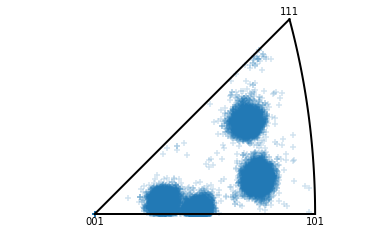

In [116]:
Quat.plotIPF(EbsdMapBeta.quatArray.flatten(), np.array([0,0,1]), "cubic", alpha=0.2)

[0.5903, -0.0622, 0.1130, 0.7968]
[0.5715, -0.6354, 0.1368, -0.5009]


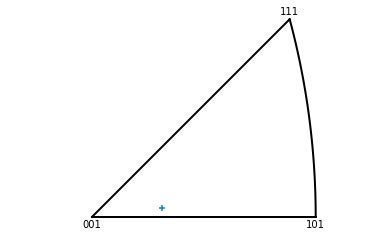

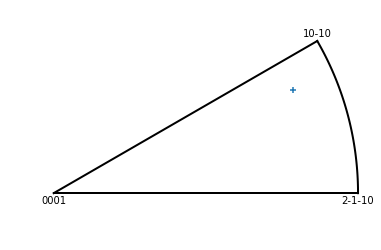

In [158]:
pointX, pointY = 200, 200 

betaOri = EbsdMapBeta.quatArray[pointY, pointX]
print(betaOri)
betaOri.plotIPF(np.array([0,0,1]), "cubic")

alphaOri = EbsdMap.quatArray[pointY, pointX]
print(alphaOri)
alphaOri.plotIPF(np.array([0,0,1]), "hexagonal")

[[0.5540, -0.4742, 0.1347, 0.6709],
 [0.3673, -0.0946, -0.9059, -0.1882],
 [0.7075, 0.1266, 0.3928, -0.5737],
 [0.2400, 0.8661, -0.0826, 0.4306],
 [0.3598, -0.8437, 0.1580, 0.3657],
 [0.0691, -0.9872, 0.1389, -0.0375],
 [0.4849, 0.5130, -0.0042, 0.7083],
 [0.5998, 0.0224, 0.0754, 0.7963],
 [0.7964, 0.0623, -0.1128, -0.5909],
 [0.4291, 0.1570, 0.7931, -0.4027],
 [0.0357, 0.1453, 0.9810, -0.1238],
 [0.6718, -0.0187, -0.5882, -0.4498]]

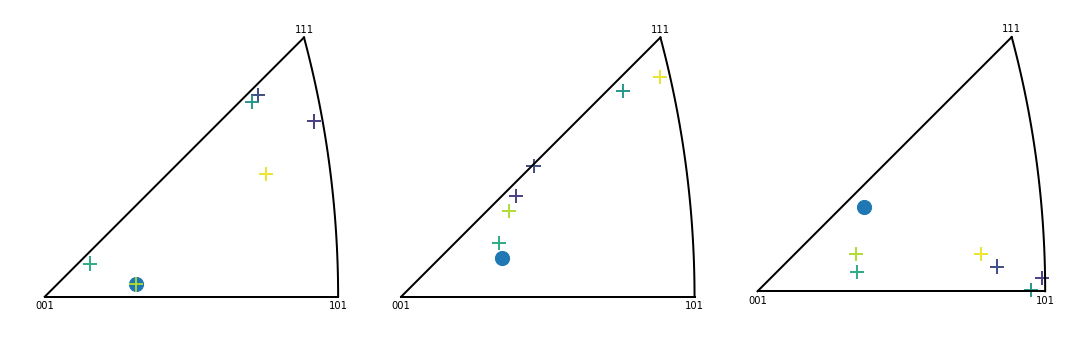

In [159]:
size = 200

betaOris = []

for symm in hexSymms:
    betaReOri = burgersQuat * (symm.conjugate * alphaOri)
        
    betaOris.append(betaReOri)
    
fig, axes = plt.subplots(1,3, figsize=(15,5))

plot = Quat.plotIPF([betaOri], np.array([0,0,1]), "cubic", marker='o', s=size, fig=fig, ax=axes[0])
Quat.plotIPF(betaOris, np.array([0,0,1]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plot = Quat.plotIPF([betaOri], np.array([0,1,0]), "cubic", marker='o', s=size, fig=fig, ax=axes[1])
Quat.plotIPF(betaOris, np.array([0,1,0]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plot = Quat.plotIPF([betaOri], np.array([1,0,0]), "cubic", marker='o', s=size, fig=fig, ax=axes[2])
Quat.plotIPF(betaOris, np.array([1,0,0]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plt.tight_layout()

betaOris

In [82]:
for symm in hexSymms:
    oriSymm = symm * alphaOri
    print(oriSymm.rotMatrix().flatten())
    
    print(np.matmul(symm.rotMatrix(), alphaOri.rotMatrix()).flatten())
    
    print(np.allclose(
        oriSymm.rotMatrix(),
        np.matmul(symm.conjugate.rotMatrix(), alphaOri.rotMatrix())
    ))
    
    print(" ")

[ 0.46069228  0.39865342  0.79299311 -0.74643449 -0.30937336  0.58917202
  0.48020639 -0.86334441  0.15504274]
[ 0.46069228  0.39865342  0.79299311 -0.74643449 -0.30937336  0.58917202
  0.48020639 -0.86334441  0.15504274]
True
 
[ 0.46069228  0.39865342  0.79299311  0.74643449  0.30937336 -0.58917202
 -0.48020639  0.86334441 -0.15504274]
[ 0.46069228  0.39865342  0.79299311  0.74643449  0.30937336 -0.58917202
 -0.48020639  0.86334441 -0.15504274]
True
 
[-0.46069228 -0.39865342 -0.79299311 -0.74643449 -0.30937336  0.58917202
 -0.48020639  0.86334441 -0.15504274]
[-0.46069228 -0.39865342 -0.79299311 -0.74643449 -0.30937336  0.58917202
 -0.48020639  0.86334441 -0.15504274]
True
 
[-0.46069228 -0.39865342 -0.79299311  0.74643449  0.30937336 -0.58917202
  0.48020639 -0.86334441  0.15504274]
[-0.46069228 -0.39865342 -0.79299311  0.74643449  0.30937336 -0.58917202
  0.48020639 -0.86334441  0.15504274]
True
 
[ 0.87677737  0.4672519  -0.11374138  0.02575397  0.19055731  0.98133819
  0.4802063

In [138]:
misOris = np.ones((len(betaOris), len(betaOris)))

for i in range(len(betaOris)):
#     for j in range(i+1, len(betaOris)):
    for j in range(len(betaOris)):
        misOris[i, j] = betaOris[i].misOri(betaOris[j], "cubic")

misOris[misOris > 1.] = 1.
misOris = 2 * np.arccos(misOris) * 180 / np.pi
for i in range(len(betaOris)):
    misOris[i, i] = -1.

with np.printoptions(precision=1, suppress=True):
    print(misOris)

[[-1.  60.  60.  10.5 49.5 60. ]
 [60.  -1.  60.  60.  10.5 49.5]
 [60.  60.  -1.  49.5 60.  10.5]
 [10.5 60.  49.5 -1.  60.  60. ]
 [49.5 10.5 60.  60.  -1.  60. ]
 [60.  49.5 10.5 60.  60.  -1. ]]


In [144]:
misOris = np.ones(len(betaOris))

for i in range(len(betaOris)):
    misOris[i] = betaOris[i].misOri(betaOri, "cubic")

misOris[misOris > 1.] = 1.
misOris = 2 * np.arccos(misOris) * 180 / np.pi

with np.printoptions(precision=1, suppress=True):
    print(misOris)

[51.6 54.5 42.2 48.6 43.3 44.5]


[[0.4701, -0.3366, -0.0009, 0.8159],
 [0.2878, -0.7462, 0.1214, 0.5879],
 [0.0284, -0.9558, 0.2112, 0.2024],
 [0.8342, -0.0234, 0.2518, -0.4900],
 [0.5570, -0.2224, -0.6850, -0.4135],
 [0.2772, 0.1991, 0.9368, -0.0765]]

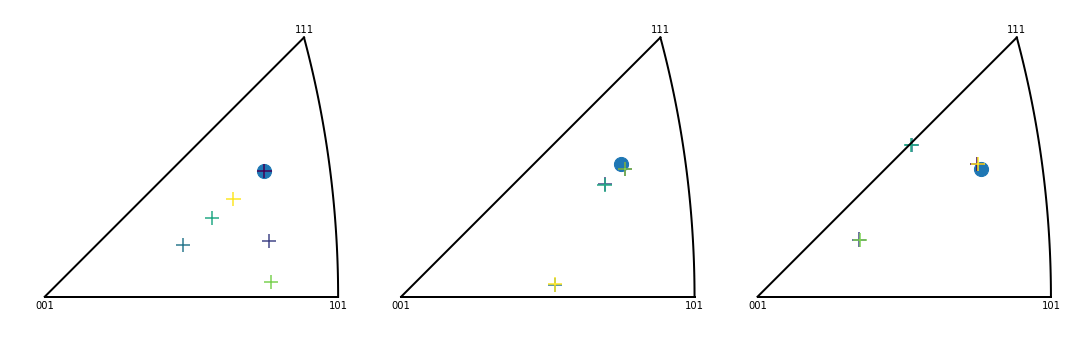

In [128]:
size = 200

betaOris = []

for symm in hexFundSymms:
    betaReOri = burgersQuat * symm.conjugate * alphaOri
    
    betaOris.append(betaReOri)

fig, axes = plt.subplots(1,3, figsize=(15,5))

plot = Quat.plotIPF([betaOri], np.array([0,0,1]), "cubic", marker='o', s=size, fig=fig, ax=axes[0])
Quat.plotIPF(betaOris, np.array([0,0,1]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plot = Quat.plotIPF([betaOri], np.array([0,1,0]), "cubic", marker='o', s=size, fig=fig, ax=axes[1])
Quat.plotIPF(betaOris, np.array([0,1,0]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plot = Quat.plotIPF([betaOri], np.array([1,0,0]), "cubic", marker='o', s=size, fig=fig, ax=axes[2])
Quat.plotIPF(betaOris, np.array([1,0,0]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plt.tight_layout()

betaOris

In [45]:
phi1 = 100.
PHI = 20.
phi2 = 30.
phi1rad = phi1 * 3.14159265358979 / 180
PHIrad = PHI * 3.14159265358979 / 180
phi2rad = phi2 * 3.14159265358979 / 180

Orientation_g = np.zeros(9)
Orientation_g[0] =  np.cos(phi1rad) * np.cos(phi2rad) - np.sin(phi1rad) * np.sin(phi2rad) * np.cos(PHIrad)
Orientation_g[1] =  np.sin(phi1rad) * np.cos(phi2rad) + np.cos(phi1rad) * np.sin(phi2rad) * np.cos(PHIrad)
Orientation_g[2] =  np.sin(phi2rad) * np.sin(PHIrad)
Orientation_g[3] = -np.cos(phi1rad) * np.sin(phi2rad) - np.sin(phi1rad) * np.cos(phi2rad) * np.cos(PHIrad)
Orientation_g[4] = -np.sin(phi1rad) * np.sin(phi2rad) + np.cos(phi1rad) * np.cos(phi2rad) * np.cos(PHIrad)
Orientation_g[5] =  np.cos(phi2rad) * np.sin(PHIrad)
Orientation_g[6] =  np.sin(phi1rad) * np.sin(PHIrad)
Orientation_g[7] = -np.cos(phi1rad) * np.sin(PHIrad)
Orientation_g[8] =  np.cos(PHIrad)

print(Orientation_g)

Quat(phi1rad, PHIrad, phi2rad).rotMatrix()

[-0.61309202  0.77128058  0.17101007 -0.71461018 -0.63371836  0.29619813
  0.33682409  0.05939117  0.93969262]


array([[-0.61309202,  0.77128058,  0.17101007],
       [-0.71461018, -0.63371836,  0.29619813],
       [ 0.33682409,  0.05939117,  0.93969262]])

In [66]:
def g_to_euler(matrix):
    g_matrix = np.zeros(9)
    pi = 3.14159265358979
    if (matrix[8] > 0.99999999):
        Cap_phi = 0
        Phi_1 = 0
        Phi_2 = np.arctan(matrix[3] / matrix[4])
    elif (matrix[8] < -0.999999999):
        Cap_phi = pi
        Phi_1 = 0
        Phi_2 = np.arctan(matrix[1] / matrix[4])
    else:
        Cap_phi = np.arccos(matrix[8])
        Phi_1 = np.arctan(-(matrix[6] / np.sin(Cap_phi)) / (matrix[7] / np.sin(Cap_phi)))
        Phi_2 = np.arctan( (matrix[2] / np.sin(Cap_phi)) / (matrix[5] / np.sin(Cap_phi)))

    g_matrix[0] =  np.cos(Phi_1) * np.cos(Phi_2) - np.sin(Phi_1) * np.sin(Phi_2) * np.cos(Cap_phi)
    g_matrix[1] =  np.sin(Phi_1) * np.cos(Phi_2) + np.cos(Phi_1) * np.sin(Phi_2) * np.cos(Cap_phi)
    g_matrix[2] =  np.sin(Phi_2) * np.sin(Cap_phi)
    g_matrix[3] = -np.cos(Phi_1) * np.sin(Phi_2) - np.sin(Phi_1) * np.cos(Phi_2) * np.cos(Cap_phi)
    g_matrix[4] = -np.sin(Phi_1) * np.sin(Phi_2) + np.cos(Phi_1) * np.cos(Phi_2) * np.cos(Cap_phi)
    g_matrix[5] =  np.cos(Phi_2) * np.sin(Cap_phi)
    g_matrix[6] =  np.sin(Phi_1) * np.sin(Cap_phi)
    g_matrix[7] = -np.cos(Phi_1) * np.sin(Cap_phi)
    g_matrix[8] =  np.cos(Cap_phi)
    
    
    if ((g_matrix[6] / matrix[6] < 0) and (g_matrix[7] / matrix[7] < 0)):
        Phi_1 = Phi_1 + pi

    if ((g_matrix[2] / matrix[2] < 0) and (g_matrix[5] / matrix[5] < 0)):
        Phi_2 = Phi_2 + pi

    if (Phi_1 < 0):
        Phi_1 = Phi_1 + 2 * pi

    if (Phi_2 < 0):
        Phi_2 = Phi_2 + 2 * pi
        
    return (Phi_1, Cap_phi, Phi_2)


In [54]:
betaOri.eulerAngles()

array([4.282689  , 0.25865779, 0.13417219])

In [71]:
for symm in hexFundSymms:
    beta_mat = np.matmul(burgersQuat.rotMatrix(), np.matmul(symm.conjugate.rotMatrix(), alphaOri.rotMatrix()))
    
    print(Quat(*g_to_euler(beta_mat.flatten())))
    
    print(burgersQuat*(symm.conjugate * alphaOri))
    
    print(" ")

[0.5540, -0.4742, 0.1347, 0.6709]
[0.5540, -0.4742, 0.1347, 0.6709]
 
[0.3598, -0.8437, 0.1580, 0.3657]
[0.3598, -0.8437, 0.1580, 0.3657]
 
[0.0691, -0.9872, 0.1389, -0.0375]
[0.0691, -0.9872, 0.1389, -0.0375]
 
[0.7075, 0.1266, 0.3928, -0.5737]
[0.7075, 0.1266, 0.3928, -0.5737]
 
[0.6718, -0.0187, -0.5882, -0.4498]
[0.6718, -0.0187, -0.5882, -0.4498]
 
[0.0357, 0.1453, 0.9810, -0.1238]
[0.0357, 0.1453, 0.9810, -0.1238]
 


## Reconstruction algorithm

[1] M. Humbert, F. Wagner, H. Moustahfid, and C. Esling, “Determination of the Orientation of a Parent β Grain from the Orientations of the Inherited α Plates in the Phase Transformation from Body-Centred Cubic to Hexagonal Close Packed,” J. Appl. Crystallogr., vol. 28, pp. 571–576, 1995.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from defdap.quat import Quat
import defdap.ebsd as ebsd

from defdap.plotting import PolePlot, MapPlot

%matplotlib qt

### Load in EBSD file, find grains and calculate grain average orientaions

In [2]:
EbsdFilePath = "/Users/mbcx9ma4/Dropbox (The University of Manchester)/Beta Reconstruction/"
EbsdFilePath += "data/triple_point/ZrNb_triplepoint_alpha"
# EbsdFilePath = "data/large/ZrNb_large_alpha"

EbsdMap = ebsd.Map(EbsdFilePath, "hexagonal")
EbsdMap.buildQuatArray()

# EbsdMap.findBoundaries(boundDef=8)
# EbsdMap.findGrains(minGrainSize=3)

# EbsdMap.calcGrainAvOris()

Loaded EBSD data (dimensions: 285 x 276 pixels, step size: 5.0 um)
Done                                               

In [4]:
# quatsO = EbsdMap.filterData()

EbsdMap.findBoundaries(boundDef=10)
EbsdMap.findGrains(minGrainSize=3)

EbsdMap.calcGrainAvOris()

Done                                               

In [33]:
quats = np.copy(quatsO)

In [34]:
misOriTol = 5
misOriTol *= np.pi / 180
misOriTol = np.cos(misOriTol / 2)

refQuat = quats[:, 0, 0]
misOrisQuad = np.abs(
    np.einsum("ijk,i->jk", quats, refQuat)
)
quats = quats[:, misOrisQuad > misOriTol]

In [35]:
misOriTol

0.9990482215818578

In [36]:
misOrisQuad

array([[1.        , 0.99977136, 0.70323523],
       [0.99971674, 0.99969357, 0.99975868],
       [0.75681592, 0.99975868, 0.88520796]])

In [38]:
quats.shape

(4, 6)

In [9]:
EbsdMap.locateGrainID(plotGBs='line')

In [10]:
EbsdMap.plotGrainMap()

In [5]:
EbsdMap.buildNeighbourNetwork()

In [6]:
EbsdMap.displayNeighbours()

### Construct subset of symmetries and the Burger transformation

In [7]:
hexSymms = Quat.symEqv("hexagonal")
hexFundSymms = [
    hexSymms[0],
    hexSymms[5],
    hexSymms[4],
    hexSymms[2],
    hexSymms[10],
    hexSymms[11]
]

cubicSymms = Quat.symEqv("cubic")
cubicFundSymms = [
    cubicSymms[0],
    cubicSymms[7],
    cubicSymms[9],
    cubicSymms[1],
    cubicSymms[22],
    cubicSymms[16],
    cubicSymms[12],
    cubicSymms[15],
    cubicSymms[4],
    cubicSymms[8],
    cubicSymms[21],
    cubicSymms[20]
]

# HCP -> BCC
eulers = np.array([135., 90., 354.74])*np.pi/180.
burgersQuat = Quat(*eulers)
burgersQuat = burgersQuat.conjugate

### Calculate possible beta orientations for each grain

In [8]:
for grain in EbsdMap:
    grain.betaOris = []

    for symm in hexFundSymms:
        grain.betaOris.append(burgersQuat * symm.conjugate * grain.refOri)


### Calculate possible beta orientations from misorientations between each grain adn its neighbours

In [9]:
import time
start = time.time()


maxDevFromBurgers = 5    # in degrees


cubicSymComps = np.empty((4, len(cubicFundSymms)))
for i, cubicSymm in enumerate(cubicFundSymms):
    cubicSymComps[:, i] = cubicSymm.quatCoef
    



# grainID = 479
# grainID = 457
# grain = EbsdMap[grainID]

numGrains = len(EbsdMap)
for grainID, grain in enumerate(EbsdMap):
# if True:
    if grainID % 10 == 0:
        print("\r Grain number {} of {}".format(grainID+1, numGrains), end="")
    
    grain.possibleBetaOris = []
    grain.betaDeviations = []

    neighbourIDs = list(EbsdMap.neighbourNetwork.neighbors(grainID))
    neighbourGrains = [EbsdMap[i] for i in neighbourIDs]
    
    grainInvOri = grain.refOri.conjugate
    
    for neighbourID, neighbourGrain in zip(neighbourIDs, neighbourGrains):
#         if neighbourID != 479:
#             continue
        
        neighbourGrainOri = neighbourGrain.refOri
        
        a2a1inv = neighbourGrainOri * grainInvOri
        
        mis144 = np.zeros((12, 12))
        RCS144 = np.zeros((12, 12), dtype=int)
        
        # calculate all posible S^B_m (eqn 11. from [1]) from the measured misorientation from 2 neighbour alpha grains
        # for each S^B_m calculate the 'closest' cubic symmetry (from subset) and the deviation from this symmetry
        for i, hexSymm in enumerate(hexSymms):
            dummy = a2a1inv * hexSymm

            for j, hexSymm2 in enumerate(hexSymms):
                Bvariant = burgersQuat * ((hexSymm2.conjugate * dummy) * burgersQuat.conjugate)
                
                misOris = np.einsum("ij,i->j", cubicSymComps, Bvariant.quatCoef)
                
#                 misOris = []
#                 for cubicSymm in cubicFundSymms:                    
#                     misOri = Bvariant.dot(cubicSymm)
#                     misOris.append(misOri)    
#                 misOris = np.abs(np.array(misOris))

                misOris = np.abs(misOris)
                misOris[misOris > 1] = 1.
                misOris = 2 * np.arccos(misOris) * 180 / np.pi
                
                minMisOriIdx = np.argmin(misOris)
                mis144[i, j] = misOris[minMisOriIdx]
                RCS144[i, j] = minMisOriIdx
        
        # find the hex symmetries (i, j) from give the minimum deviation from the burgers relation
        # for the minimum store: the deviation, the hex symmetries (i, j) and the cubic symmetry
        # if the deviation is over a threshold then set cubic symmetry to -1
        minMisOriIdx = np.unravel_index(np.argmin(mis144), mis144.shape)
        devFromBurgers = mis144[minMisOriIdx]
        cubicSymmIndx = RCS144[minMisOriIdx] if devFromBurgers < maxDevFromBurgers else -1
        a1Symm = minMisOriIdx[0]
        a2Symm = minMisOriIdx[1]
#         print(devFromBurgers, cubicSymmIndx)

#         with np.printoptions(precision=2, suppress=True, linewidth=100):
#             print(minMisOriIdx)
#             print(mis144)
#             print(devFromBurgers)
#             print(RCS144)
#             print(cubicSymmIndx)
#             print(" ")

        possibleBetaOris = []
        if cubicSymmIndx > -1 and cubicSymmIndx < 9:
            # one possible beta orientation
            # A:
            possibleBetaOris.append(
                burgersQuat * hexSymms[a1Symm].conjugate * grain.refOri
            )
            
        elif cubicSymmIndx == 9:
            # three possible beta orientation
            # A:
            possibleBetaOris.append(
                burgersQuat * hexSymms[a1Symm].conjugate * grain.refOri
            )
            # B:
            # hexFundSymms[1] is C^+_3z
            possibleBetaOris.append(
                burgersQuat * hexFundSymms[1].conjugate * hexSymms[a1Symm].conjugate * grain.refOri
            )
            # C:
            # hexFundSymms[2] is C^+_6z
            possibleBetaOris.append(
                burgersQuat * hexFundSymms[2].conjugate * hexSymms[a1Symm].conjugate * grain.refOri
            )
            
        elif cubicSymmIndx > 9:
            # two possible beta orientation
            # A:
            possibleBetaOris.append(
                burgersQuat * hexSymms[a1Symm].conjugate * grain.refOri
            )
            # D:
            # hexFundSymms[4] is C'_22
            possibleBetaOris.append(
                burgersQuat * hexFundSymms[4].conjugate * hexSymms[a1Symm].conjugate * grain.refOri
            )
            
        grain.possibleBetaOris.append(possibleBetaOris)
        grain.betaDeviations.append(devFromBurgers)
        
#         print(grainID, neighbourID)
#         print(possibleBetaOris)
#         print(devFromBurgers)
#         break
        
        
    # do all the accounting stuff
    oriTol = 3.  # in degrees
    oriTol = np.cos(oriTol / 2 * np.pi / 180.)  # divide 2 because of 2* in misorientation

    allPossibleBetaOris = [item for sublist in grain.possibleBetaOris for item in sublist]
    uniqueBetaOris = []
    countBetaOris = []
    variantIndexes = []

    for ori in allPossibleBetaOris:
        found = False
        for i, uniqueOri in enumerate(uniqueBetaOris):
            misOri = ori.misOri(uniqueOri, "cubic")
            if misOri > oriTol:
                found = True
                countBetaOris[i] += 1

        if not found:
            uniqueBetaOris.append(ori)
            countBetaOris.append(1)

            for i, betaVariant in enumerate(grain.betaOris):
                misOri = ori.misOri(betaVariant, "cubic")
                if misOri > oriTol:
                    variantIndexes.append(i)
                    break
            else:
                variantIndexes.append(-1)
                print("Couldn't find beta variant. Grain {:}".format(grainID))

    variantCount = [0, 0, 0, 0, 0, 0]
    for i in range(len(variantIndexes)):
        if i > -1:
            variantCount[variantIndexes[i]] = countBetaOris[i]

    grain.variantCount = variantCount

#     print(uniqueBetaOris)
#     print(countBetaOris)
#     print(variantIndexes)
#     print(variantCount)


end = time.time()
print(end - start)

 Grain number 1921 of 1922392.32105135917664


In [10]:
print((end - start) / 60)

6.538684189319611


In [ ]:
7.73 min
7.55 min

### Look at the data stored for each grain

In [23]:
EbsdMap.locateGrainID()

Grain ID: 886


In [11]:
grain = EbsdMap[838]

In [12]:
grain.betaOris

[[0.5411, -0.6621, -0.0950, -0.5097],
 [0.1931, 0.3502, 0.6910, 0.6022],
 [0.2009, -0.5845, -0.4538, -0.6420],
 [0.4708, 0.0264, -0.6573, 0.5879],
 [0.6217, 0.6615, -0.4003, -0.1248],
 [0.1509, 0.6351, 0.2570, -0.7126]]

In [13]:
grain.possibleBetaOris

[[[0.5411, -0.6621, -0.0950, -0.5097]],
 [[0.6217, 0.6615, -0.4003, -0.1248], [0.5411, -0.6621, -0.0950, -0.5097]],
 [[0.5353, 0.0221, 0.7430, 0.4010]]]

In [14]:
grain.betaDeviations

[4.492500506505728, 1.1921108419492337, 1.480473681805707]

In [15]:
grain.variantCount

[3, 0, 0, 0, 1, 0]

In [16]:
possibleBetaOris = [item for sublist in grain.possibleBetaOris for item in sublist]

directions = [
    np.array([1,0,0]), 
    np.array([0,1,0]), 
    np.array([0,0,1])
]
markerSize = 100

fig, axes = plt.subplots(1, len(directions))

for direction, ax in zip(directions, axes):
    plot = Quat.plotIPF(grain.betaOris, direction, "cubic", marker='o', s=markerSize, fig=fig, ax=ax)
    Quat.plotIPF(possibleBetaOris, direction, "cubic", s=markerSize, plot=plot)

fig.tight_layout()

### Find the most common variant for each grain and set this as the beta orientaion

In [17]:
modeVariants = []
parentBetaOris = []

for grain in EbsdMap:
#     modeVariant = np.argmax(grain.variantCount)
#     parentBetaOri = grain.betaOris[modeVariant]
    
    variantCount = np.array(grain.variantCount)
    modeVariant = np.where(variantCount == np.max(variantCount))[0]
    if len(modeVariant) == 1:
        modeVariant = modeVariant[0]
        parentBetaOri = grain.betaOris[modeVariant]
    else:
        # multiple variants with same max
        modeVariant = -1
        parentBetaOri = Quat(1., 0., 0., 0.)
    
    modeVariants.append(modeVariant)
    grain.modeVariant = modeVariant
    parentBetaOris.append(parentBetaOri)
    grain.parentBetaOri = parentBetaOri

### Plot

In [18]:
plot = EbsdMap.plotGrainDataMap(grainData=modeVariants, vmin=-1, vmax=5, cmap="Set1")
plot.addColourBar("mode variant")

In [19]:
directions = [
    np.array([1,0,0]),
    np.array([0,1,0]),
    np.array([0,0,1])
]

fig, axes = plt.subplots(1, len(directions), figsize=(15,5))

for ax, direction in zip(axes, directions):
    betaGrainIPFColours = Quat.calcIPFcolours(parentBetaOris, direction, "cubic")

    EbsdMap.plotGrainDataMap(grainData=betaGrainIPFColours, fig=fig, ax=ax)
    
fig.tight_layout()

## Kuwahara filter

In [4]:
quatArray = EbsdMap.quatArray

quatComps = np.empty((4,) + quatArray.shape)

# store quat components in array
for idx in np.ndindex(quatArray.shape):
    quatComps[(slice(None),) + idx] = quatArray[idx].quatCoef
    
misOris = np.zeros((4,) + quatArray.shape)
        
for i in range(2, quatArray.shape[0]-2):
    for j in range(2, quatArray.shape[1]-2):
        
        refQuat = quatComps[:, i, j]
        
#         quats = quatArray[i-2:i+3, j-2:j+3]
        quadrants = [
            quatComps[:, i-2:i+1, j-2:j+1],  # UL
            quatComps[:, i-2:i+1, j:j+3],    # UR
            quatComps[:, i:i+3, j-2:j+1],    # LL
            quatComps[:, i:i+3, j:j+3],      # LR
        ]
        
        for k, quats in enumerate(quadrants):
            misOri = np.abs(np.einsum("ijk,i->jk", quats, refQuat)).mean()
            misOris[k, i, j] = misOri
        

In [5]:
minMisOriQuadrant = np.argmax(misOris, axis=0)
minMisOris = 2 * np.arccos(np.max(misOris, axis=0))

In [6]:
misOriTol = 5 * np.pi / 180

quatCompsNew = np.copy(quatComps)

for i in range(2, quatArray.shape[0]-2):
    for j in range(2, quatArray.shape[1]-2):
        if minMisOris[i, j] > misOriTol:
            continue

        quadrants = [
            quatComps[:, i-2:i+1, j-2:j+1],  # UL
            quatComps[:, i-2:i+1, j:j+3],    # UR
            quatComps[:, i:i+3, j-2:j+1],    # LL
            quatComps[:, i:i+3, j:j+3],      # LR
        ]
        
        qauts = quadrants[minMisOriQuadrant[i, j]]
        
        avOri = np.einsum("ijk->i", qauts)
        avOri /= np.sqrt(np.dot(avOri, avOri))
        
        quatCompsNew[:, i, j] = avOri


In [7]:
quatArrayNew = np.empty(quatArray.shape, dtype=Quat)

for idx in np.ndindex(quatArray.shape):
    quatArrayNew[idx] = Quat(quatCompsNew[(slice(None),) + idx])
    

### Plot

In [9]:
from defdap.plotting import MapPlot

In [10]:
direction = np.array([0,0,1])

In [13]:
EbsdMap.quatArray = quatArray
EbsdMap.findBoundaries(boundDef=3)
plot = EbsdMap.plotIPFMap(direction)
plot.addGrainBoundaries(colour='k')

Done                                               

In [14]:
EbsdMap.quatArray = quatArrayNew
EbsdMap.findBoundaries(boundDef=3)
plot = EbsdMap.plotIPFMap(direction)
plot.addGrainBoundaries(colour='k')

Done                                               

In [23]:
# calculate IPF colours
IPFcolours = Quat.calcIPFcolours(
    quatArrayNew.flatten(),
    direction,
    'cubic'
)
# reshape back to map shape array
IPFcolours = np.reshape(IPFcolours, quatArrayNew.shape + (3,))

plot = MapPlot.create(EbsdMap, IPFcolours)

In [43]:
i,j=2,2
quatArray = np.zeros((276, 285), dtype=int)



quats = quatArray[i-2:i+3, j-2:j+3]


quatsUL = quatArray[i-2:i+1, j-2:j+1]
quatsUC = quatArray[i-2:i+1, j-1:j+2]
quatsUR = quatArray[i-2:i+1, j:j+3]
quatsMR = quatArray[i-1:i+2, j:j+3]
quatsLR = quatArray[i:i+3, j:j+3]
quatsLC = quatArray[i:i+3, j-1:j+2]
quatsLL = quatArray[i:i+3, j-2:j+1]
quatsML = quatArray[i-1:i+2, j-2:j+1]

quatArray[i-1:i+2, j-2:j+1] = 1


plt.imshow(quats)

## Check known alpha -> beta orientations

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from defdap.quat import Quat
from sys import exit

def ori_matrix(phi1,Phi,phi2,passive=True):

    '''
    Returns (passive) orientation matrix, as a np.matrix from
    3 euler angles (in degrees). 
    '''
    
    phi1=np.radians(phi1)
    Phi=np.radians(Phi)
    phi2=np.radians(phi2)
    R11 = np.cos(phi1)*np.cos(phi2)-np.sin(phi1)*np.cos(Phi)*np.sin(phi2)
    R12 = np.sin(phi1)*np.cos(phi2)+ np.cos(phi1)*np.cos(Phi)*np.sin(phi2)
    R13 = np.sin(phi2)*np.sin(Phi)
    R21 = -np.cos(phi1)*np.sin(phi2)-np.sin(phi1)*np.cos(Phi)*np.cos(phi2)
    R22 = - np.sin(phi1)*np.sin(phi2)+np.cos(phi1)*np.cos(Phi)*np.cos(phi2)
    R23 = np.cos(phi2)*np.sin(Phi)
    R31 = np.sin(phi1)*np.sin(Phi)
    R32= -np.sin(Phi)*np.cos(phi1)
    R33= np.cos(Phi)
    matrix=np.matrix([[R11,R12,R13],[R21,R22,R23],[R31,R32,R33]])
    if not passive: # matrix above is for the passive rotation 
        matrix=matrix.transpose()
    return matrix

def get_proj(g,pole,proj='stereo'):
    ''' 
    Returns polar projection vector from an orientation matrix (g),
    a pole vector (pole) using either stereographic or equal area projection,
    '''
    n=np.linalg.norm(pole)
    pole=np.matrix(pole).T/n
    vector=g.T*pole #invert matrix
    alpha=np.arccos(vector[2])
    if np.isclose(alpha,0.0):
        beta=np.matrix([0.0])
    else:
        beta=np.arctan2(vector[1]/np.sin(alpha),vector[0]/np.sin(alpha))
       
    if alpha>np.pi/2:
        alpha = np.pi-alpha
        beta += np.pi
    
    if proj=='stereo':
        Op=np.tan(alpha/2)
    if proj=='equal area':
        Op=np.sqrt(2)*np.sin(alpha/2)
        
    return Op, beta,vector

def plot_poles(beta_list, Op_list):
    '''
    Plots a pole figure from a list of angles (beta_list) in radians, 
    and a list of radii (Op_list). 
    '''

    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='polar')
    for beta, Op in zip(beta_list, Op_list):
        ax.plot(beta, Op,'o',ms=18, alpha=0.5)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylim([0,1.0])

def get_vectors(g,pole_list, proj='stereo'):
    '''
    Returns a list of vectors and correponding polar angle and radius
    for an orientation matrix (g), using a chosen projection (proj).
    '''  

    Op_list=[]
    beta_list=[]
    vector_list=[]
    
    for pole in pole_list:
        Op,beta,vector=get_proj(g,pole,proj)
        Op_list.append(Op)
        beta_list.append(beta)
        vector_list.append(vector)
    
    return Op_list, beta_list, vector_list

def get_pole_list(pole='001'):
    ''' 
    Returns all symmetric variants of the '001', '110' or '111' poles.
    '''

    pole_dict = {
        '001': [np.array([1,0,0]), np.array([0,1,0]),np.array([0,0,1]),
               np.array([-1,0,0]), np.array([0,-1,0]),np.array([0,0,-1])],
        '110': [np.array([1,1,0]), np.array([1,0,1]),np.array([0,1,1]),
               np.array([-1,-1,0]), np.array([-1,0,-1]),np.array([0,-1,-1]),
               np.array([-1,1,0]), np.array([-1,0,1]),np.array([0,-1,1]),
               np.array([1,-1,0]), np.array([1,0,-1]),np.array([0,1,-1])],
        '111': [np.array([1,1,1]), np.array([-1,1,1]),np.array([1,-1,1]), np.array([1,1,-1]),
               np.array([-1,-1,-1]), np.array([-1,-1,1]),np.array([1,-1,-1]), np.array([-1,1,-1])]
    }
    pole_list=pole_dict[pole]
    return pole_list


# Utility functions

def euler_to_quat(phi1,Phi,phi2):
    """Takes euler angles in degrees and returns quaternion"""
    parent_eulers = np.radians(np.array((phi1, Phi, phi2)))
    ori_quat = Quat(*parent_eulers)
    return ori_quat

# Plotting

def plot_pole(g, pole='001', legend=False):
    ''' Plots a pole figure from an orientation matrix (g)
        for s chosen pole (pole). Pole can be the '001', '110' or '111'.
    '''
    
    pole_list=get_pole_list(pole)
    Op_list, beta_list, vector_list=get_vectors(g,pole_list)
    plot_poles(beta_list, Op_list)
    if legend:
        plt.legend(pole_list,bbox_to_anchor=(1.5, 1.05))
    #return beta_list, Op_list
    
def plot_all_poles(g, proj= 'stereo', fig = None, label='ro'):
    ''' Plots 3 pole figures from an orientation matrix (g)
        for s chosen pole (pole), correponding to the '001', '110' 
        and '111' poles.
    '''
    poles=['001','110','111']
    if fig == None:
        fig = plt.figure(figsize=(10,30))
    for n, pole in enumerate(poles):
        pole_list=get_pole_list(pole)
        Op_list, beta_list, vector_list=get_vectors(g,pole_list,proj)
        ax = fig.add_subplot(1,3,n+1, projection='polar')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim([0,1.0])
        ax.set_title(pole)
        for beta, Op in zip(beta_list, Op_list):
            ax.plot(beta, Op,label,ms=14, alpha=0.5)

def plot_all_poles_multi(g_list, proj= 'stereo', fig = None ,label='go' ):
    ''' Plots 3 pole figures from a list of orientation matrices (g_list)
        for s chosen pole (pole), correponding to the '001', '110' 
        and '111' poles.
    '''
    poles=['001','110','111']
    if fig == None:
        fig = plt.figure(figsize=(10,30))
    pole_figures=[]
    for n, pole in enumerate(poles): 
        ax = fig.add_subplot(1,3,n+1, projection='polar')
        pole_figures.append(ax)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim([0,1.0])
        ax.set_title(pole)
    for g in g_list:
        for pole_figure, pole in zip(pole_figures,poles):
            pole_list=get_pole_list(pole)
            Op_list, beta_list, vector_list=get_vectors(g,pole_list,proj)
            for beta, Op in zip(beta_list, Op_list):
                pole_figure.plot(beta, Op, label,ms=10, alpha=0.5)

def twinOrientation(parentOri, axis, angle = 60.0):
    """Calculates twin orientation quaternion from parent orientation quaternion
        by rotating about axis by angle"""
    twinRot = Quat.fromAxisAngle(axis, np.radians(angle))
    twinOri = twinRot * parentOri
    return twinOri

In [222]:
g=ori_matrix(10.0,0.0,0.0)
plot_all_poles(g,proj='equal area')

In [230]:
eulers = np.array([10., 10., 10.]) * np.pi / 180.
testOri = Quat(*eulers)

plot_all_poles(testOri.rotMatrix(), proj='equal area')

In [229]:
testOri.plotIPF(np.array([1,0,0]), "hexagonal")

In [216]:
testBetaOris = []

for symm in hexFundSymms:
    betaOri = burgersQuat * symm * testOri
    
    testBetaOris.append(betaOri)
    
len(testBetaOris)

6

In [217]:
plot_all_poles(testBetaOris[0].rotMatrix(), proj='equal area')

In [ ]:
size = 200

betaOris = []

for symm in hexFundSymms:
    betaReOri = burgersQuat * symm.conjugate * alphaOri
    
    betaOris.append(betaReOri)

fig, axes = plt.subplots(1,3, figsize=(15,5))

plot = Quat.plotIPF([betaOri], np.array([0,0,1]), "cubic", marker='o', s=size, fig=fig, ax=axes[0])
Quat.plotIPF(betaOris, np.array([0,0,1]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plot = Quat.plotIPF([betaOri], np.array([0,1,0]), "cubic", marker='o', s=size, fig=fig, ax=axes[1])
Quat.plotIPF(betaOris, np.array([0,1,0]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plot = Quat.plotIPF([betaOri], np.array([1,0,0]), "cubic", marker='o', s=size, fig=fig, ax=axes[2])
Quat.plotIPF(betaOris, np.array([1,0,0]), "cubic", plot=plot, c=np.arange(len(betaOris)), s=size)

plt.tight_layout()

betaOris